#### **Data analytics project steps**:


1.   Understand business problem
2.   Data collection and understanding
3.   Data cleaning and exploration
4.   Data transformation
5.   Collect insights



---

### ✅ **Problem Statement**

What are we trying to solve with data?
👉 *Example: “Can we predict which customers will leave?”*

---

### ✅ **OLTP vs OLAP**

* **OLTP** = Systems that handle everyday tasks
  👉 *Like making purchases or booking tickets*

* **OLAP** = Systems that help analyze data
  👉 *Like checking sales trends or reports*

---

### ✅ **ETL (Extract, Transform, Load)**

How raw data becomes clean and useful:

* **Extract** – Take data from sources
* **Transform** – Clean and change it
* **Load** – Put it into storage

---

### ✅ **Data Warehouse**

A big storage for clean, organized data used for **analysis and reports**.
👉 *Not for daily use, but for understanding the business.*

---


**Some other definations**:


*   A **star schema** stores numbers in one table and details in connected tables for easy analysis.

*   A **snowflake schema** is like a star schema, but the dimension tables are split into more detailed tables, making it more organized but more complex. Example: Product → split into Category and Brand tables

*   A **fact table** stores the main numbers or measurements (like sales or quantities) in a database for analysis.

*   A **dimension table** stores details (like product, date, or customer info) that describe the facts in a fact table.

*   **Database Normalization** - Normalization is the process of organizing data in a database to remove duplicates and ensure consistency.


# Data exploration

In [7]:
import pandas as pd
df_bookings = pd.read_csv("/content/fact_bookings.csv")
df_bookings

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010.0,10010.0
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100.0,3640.0
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000.0,9100.0
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100.0,3640.0
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920.0,10920.0
...,...,...,...,...,...,...,...,...,...,...,...,...
22878,May152218560RT34,18560,11/5/2022,15-05-22,16-05-22,2.0,RT3,others,NaN,No Show,12000.0,12000.0
22879,May152218560RT35,18560,12/5/2022,15-05-22,16-05-22,1.0,RT3,makeyourtrip,NaN,Checked Out,12000.0,12000.0
22880,May152218560RT36,18560,8/5/2022,15-05-22,16-05-22,1.0,RT3,tripster,NaN,Checked Out,12000.0,12000.0
22881,May152218560RT37,18560,15-05-22,15-05-22,16-05-22,1.0,RT3,others,NaN,Cancelled,12000.0,4800.0


In [8]:
df_bookings.shape

(22883, 12)

In [9]:
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4', nan], dtype=object)

In [10]:
df_bookings.booking_platform.unique()

array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline', nan], dtype=object)

In [11]:
# count of bookings per platform
df_bookings.booking_platform.value_counts()

,count
booking_platform,
others,9442
makeyourtrip,4584
logtrip,2477
direct online,2180
tripster,1678
journey,1372
direct offline,1149


<Axes: ylabel='booking_platform'>

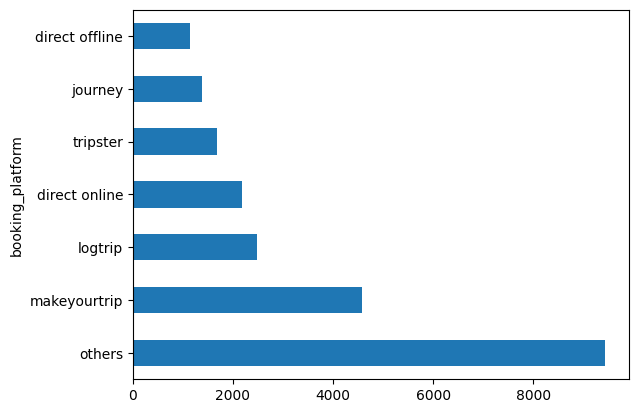

In [12]:
# bar chart
df_bookings.booking_platform.value_counts().plot(kind="barh")

In [13]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,22883.000000,22879.000000,9560.000000,2.288200e+04,22882.000000
mean,18033.557838,2.031470,3.638389,1.718962e+04,12689.787562
std,1089.623698,1.037991,1.230472,2.152890e+05,6938.267245
min,16558.000000,-12.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [14]:
# minimum and maximum revenue
df_bookings.revenue_generated.min(), df_bookings.revenue_generated.max()

(6500.0, 28560000.0)

In [15]:
df_date = pd.read_csv("/content/dim_date.csv")
df_hotels = pd.read_csv("/content/dim_hotels.csv")
df_rooms = pd.read_csv("/content/dim_rooms.csv")
df_agg_bookings = pd.read_csv("/content/fact_aggregated_bookings.csv")

In [16]:
# shape of df_hotels
df_hotels.shape

(25, 4)

In [17]:
# first few rows of df_hotels
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [18]:
# value counts for category column
df_hotels.category.value_counts()

,count
category,
Luxury,16
Business,9


In [19]:
# exploring how many hotels in each of the cities
df_hotels.city.value_counts()

,count
city,
Mumbai,8
Hyderabad,6
Bangalore,6
Delhi,5


In [20]:
# in order to get it in ascending order
df_hotels.city.value_counts().sort_values()

,count
city,
Delhi,5
Hyderabad,6
Bangalore,6
Mumbai,8


<Axes: xlabel='city'>

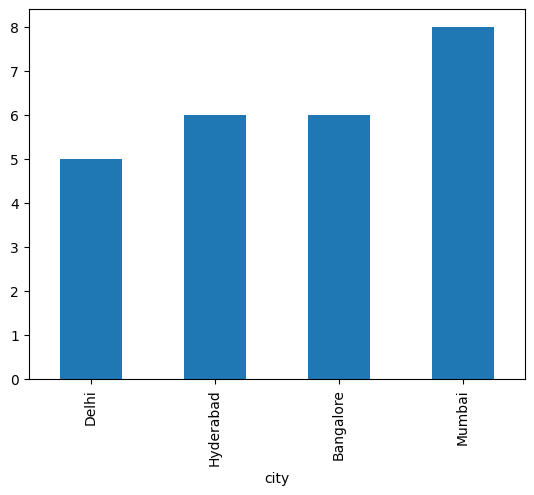

In [21]:
# bar chart for number of hotel
df_hotels.city.value_counts().sort_values().plot(kind="bar")

***
**Exercise: Explore aggregate bookings**
***

In [22]:
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0


**Exercise-1. Find out unique property ids in aggregate bookings dataset**

In [23]:
df_agg_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560])

**Exercise-2. Find out total bookings per property_id**

In [24]:
df_agg_bookings.groupby("property_id")["successful_bookings"].sum()

,successful_bookings
property_id,
16558,3153
16559,7338
16560,4693
16561,4418
16562,4820
16563,7211
17558,5053
17559,6142
17560,6013


**Exercise-3. Find out days on which bookings are greater than capacity**

In [25]:
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


**Exercise-4. Find out properties that have highest capacity**

In [26]:
df_agg_bookings.capacity.max()

50.0

# Data Cleaning

In [27]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,22883.000000,22879.000000,9560.000000,2.288200e+04,22882.000000
mean,18033.557838,2.031470,3.638389,1.718962e+04,12689.787562
std,1089.623698,1.037991,1.230472,2.152890e+05,6938.267245
min,16558.000000,-12.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [28]:
# list of negative guests
df_bookings[df_bookings.no_guests<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010.0,10010.0
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100.0,3640.0
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900.0,20900.0
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000.0,3600.0
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800.0,16800.0
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400.0,5760.0


In [29]:
# storing "no_guests > 0" values in the same dataframe (in order to remove negative values)
df_bookings = df_bookings[df_bookings.no_guests>0]

In [30]:
# minimum and maximum revenue
df_bookings.revenue_generated.min(), df_bookings.revenue_generated.max()

(6500.0, 28560000.0)

#### the max one is showing error because from a single transaction 28560000 revenue not possible

In [31]:
# If the value is greater than 3 standard deviation, I will count those as error
avg, std = df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.std()
print(avg, std)

higher_limit = avg + 3*std
print("Higher limit: ", higher_limit)

lower_limit = avg - 3*std
print("Lower limit", lower_limit)

17190.784768067155 215331.290852002
Higher limit:  663184.6573240733
Lower limit -628803.0877879389


In [32]:
# checking if there is any value below lower limit
df_bookings[df_bookings.revenue_generated<lower_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


##### no value, so it's safe

In [33]:
# now checking if there is any value more than higher limit
df_bookings[df_bookings.revenue_generated>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000.0,9100.0
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000.0,28560.0
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000.0,12600.0
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000.0,4420.0


##### now need to clean them

In [34]:
df_bookings = df_bookings[df_bookings.revenue_generated<higher_limit]

In [35]:
df_bookings.revenue_realized.describe()

,revenue_realized
count,22869.000000
mean,12689.861778
std,6938.072524
min,2600.000000
25%,7600.000000
50%,11700.000000
75%,15300.000000
max,45220.000000


In [36]:
higher_limit = df_bookings.revenue_realized.mean() + 3*df_bookings.revenue_realized.std()
higher_limit

np.float64(33504.07935078126)

In [37]:
df_bookings[df_bookings.revenue_realized>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
137,May012216559RT41,16559,27-04-22,1/5/2022,7/5/2022,4.0,RT4,others,NaN,Checked Out,38760.0,38760.0
139,May012216559RT43,16559,1/5/2022,1/5/2022,2/5/2022,6.0,RT4,tripster,3.0,Checked Out,45220.0,45220.0
143,May012216559RT47,16559,28-04-22,1/5/2022,3/5/2022,3.0,RT4,others,5.0,Checked Out,35530.0,35530.0
149,May012216559RT413,16559,24-04-22,1/5/2022,7/5/2022,5.0,RT4,logtrip,NaN,Checked Out,41990.0,41990.0
222,May012216560RT45,16560,30-04-22,1/5/2022,3/5/2022,5.0,RT4,others,3.0,Checked Out,34580.0,34580.0
...,...,...,...,...,...,...,...,...,...,...,...,...
22518,May152217560RT49,17560,11/5/2022,15-05-22,16-05-22,4.0,RT4,others,4.0,Checked Out,38760.0,38760.0
22578,May152217561RT41,17561,15-05-22,15-05-22,17-05-22,3.0,RT4,logtrip,NaN,Checked Out,35530.0,35530.0
22579,May152217561RT42,17561,11/5/2022,15-05-22,17-05-22,6.0,RT4,others,NaN,Checked Out,45220.0,45220.0
22620,May152217562RT41,17562,11/5/2022,15-05-22,21-05-22,5.0,RT4,makeyourtrip,NaN,Checked Out,41990.0,41990.0


One observation I can have in above dataframe is that all rooms are RT4 which means presidential suit. Now since RT4 is a luxurious room it is likely their rent will be higher. To make a fair analysis, I need to do data analysis only on RT4 room types

In [38]:
df_bookings[df_bookings.room_category=="RT4"].revenue_realized.describe()

,revenue_realized
count,2721.000000
mean,23515.715546
std,8988.030149
min,7600.000000
25%,19000.000000
50%,26600.000000
75%,32300.000000
max,45220.000000


In [39]:
# mean + 3*standard deviation
23439+3*9048

50583

Here higher limit comes to be 50583 and in my dataframe above I can see that max value for revenue realized is 45220. Hence I can conclude that there is no outlier and I don't need to do any data cleaning on this particular column

In [40]:
# checking null values
df_bookings.isnull().sum()

,0
booking_id,0
property_id,0
booking_date,0
check_in_date,0
checkout_date,0
no_guests,0
room_category,0
booking_platform,0
ratings_given,13314
booking_status,0


Total values in our dataframe is 134576. Out of that 77899 rows has null rating. Since there are many rows with null rating, I should not filter these values. Also I should not replace this rating with a median or mean rating etc

# Data Cleaning - Exercise

**Exercise-1. In aggregate bookings find columns that have null values. Fill these null values with whatever you think is the appropriate subtitute (possible ways is to use mean or median)**

In [41]:
df_agg_bookings.isnull().sum()

,0
property_id,0
check_in_date,0
room_category,0
successful_bookings,0
capacity,2


In [42]:
df_agg_bookings[df_agg_bookings.capacity.isna()]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,NaN
14,17562,1-May-22,RT1,12,NaN


In [43]:
df_agg_bookings.capacity.median()

25.0

In [44]:
df_agg_bookings.capacity.fillna(df_agg_bookings.capacity.median(), inplace=True)

<ipython-input-44-625765049>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_agg_bookings.capacity.fillna(df_agg_bookings.capacity.median(), inplace=True)


In [45]:
df_agg_bookings.loc[[8,15]]

,property_id,check_in_date,room_category,successful_bookings,capacity
8,17561,1-May-22,RT1,22,25.0
15,17563,1-May-22,RT1,21,25.0


**Exercise-2. In aggregate bookings find out records that have successful_bookings value greater than capacity. Filter those records**

In [46]:
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [47]:
df_agg_bookings.shape

(9200, 5)

In [48]:
df_agg_bookings = df_agg_bookings[df_agg_bookings.successful_bookings<=df_agg_bookings.capacity]
df_agg_bookings.shape

(9194, 5)

# Data Transformation

In [49]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
4,16558,1-May-22,RT1,18,19.0
5,17560,1-May-22,RT1,28,40.0


In [50]:
# creating occupancy percentage column
df_agg_bookings["occupancy_percentage"] = df_agg_bookings.successful_bookings/df_agg_bookings.capacity*100
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_percentage
0,16559,1-May-22,RT1,25,30.0,83.333333
1,19562,1-May-22,RT1,28,30.0,93.333333
2,19563,1-May-22,RT1,23,30.0,76.666667
4,16558,1-May-22,RT1,18,19.0,94.736842
5,17560,1-May-22,RT1,28,40.0,70.000000


There are various types of data transformations. Few examples of data transformations are,

1. Creating new columns
1. Normalization
1. Merging data
1. Aggregation

# Insights Generation
Definition: The process of discovering meaningful patterns, trends, or explanations from data that inform decision-making.

##### Ad Hoc Analysis: A one-time, spontaneous analysis done to answer a specific business question.

**1. What is an average occupancy rate in each of the room categories?**

In [51]:
df_agg_bookings.groupby("room_category")["occupancy_percentage"].mean().round(2)

,occupancy_percentage
room_category,
RT1,57.89
RT2,58.01
RT3,58.03
RT4,59.28


#### Instead of RT1, RT2 etc., I would like to print room categories such as Standard, Premium, Elite etc along with average occupancy percentage

In [52]:
df_rooms.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [53]:
df_rooms

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [54]:
df = pd.merge(df_agg_bookings, df_rooms, left_on="room_category", right_on="room_id")
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_percentage,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83.333333,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93.333333,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,76.666667,RT1,Standard
3,16558,1-May-22,RT1,18,19.0,94.736842,RT1,Standard
4,17560,1-May-22,RT1,28,40.0,70.000000,RT1,Standard


In [55]:
df.groupby("room_class")["occupancy_percentage"].mean().round(2)

,occupancy_percentage
room_class,
Elite,58.01
Premium,58.03
Presidential,59.28
Standard,57.89


In [56]:
# in df, room id is showing 2 times (room_id, room_category)
df.drop("room_id", axis=1, inplace=True) # "inplace=True" means modify that dataframe
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_percentage,room_class
0,16559,1-May-22,RT1,25,30.0,83.333333,Standard
1,19562,1-May-22,RT1,28,30.0,93.333333,Standard
2,19563,1-May-22,RT1,23,30.0,76.666667,Standard
3,16558,1-May-22,RT1,18,19.0,94.736842,Standard
4,17560,1-May-22,RT1,28,40.0,70.000000,Standard


**2. Print average occupancy rate per city**

In [57]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [58]:
df = pd.merge(df, df_hotels, on="property_id")
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_percentage,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.333333,Standard,Atliq Exotica,Luxury,Mumbai
1,19562,1-May-22,RT1,28,30.0,93.333333,Standard,Atliq Bay,Luxury,Bangalore
2,19563,1-May-22,RT1,23,30.0,76.666667,Standard,Atliq Palace,Business,Bangalore
3,16558,1-May-22,RT1,18,19.0,94.736842,Standard,Atliq Grands,Luxury,Delhi
4,17560,1-May-22,RT1,28,40.0,70.000000,Standard,Atliq City,Business,Mumbai


In [59]:
df.groupby("city")["occupancy_percentage"].mean().round(2)

,occupancy_percentage
city,
Bangalore,56.33
Delhi,61.51
Hyderabad,58.12
Mumbai,57.91


**3. When was the occupancy better? Weekday or Weekend?**

In [60]:
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_percentage,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.333333,Standard,Atliq Exotica,Luxury,Mumbai
1,19562,1-May-22,RT1,28,30.0,93.333333,Standard,Atliq Bay,Luxury,Bangalore
2,19563,1-May-22,RT1,23,30.0,76.666667,Standard,Atliq Palace,Business,Bangalore
3,16558,1-May-22,RT1,18,19.0,94.736842,Standard,Atliq Grands,Luxury,Delhi
4,17560,1-May-22,RT1,28,40.0,70.000000,Standard,Atliq City,Business,Mumbai


In [61]:
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


#### Now I can join df & df_date with (check_in_date, and date) columns

In [62]:
df = pd.merge(df, df_date, left_on="check_in_date", right_on="date")
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_percentage,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,19563,10-May-22,RT3,15,29.0,51.724138,Premium,Atliq Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday
1,18560,10-May-22,RT1,19,30.0,63.333333,Standard,Atliq City,Business,Hyderabad,10-May-22,May 22,W 20,weekeday
2,19562,10-May-22,RT1,18,30.0,60.000000,Standard,Atliq Bay,Luxury,Bangalore,10-May-22,May 22,W 20,weekeday
3,19563,10-May-22,RT1,16,30.0,53.333333,Standard,Atliq Palace,Business,Bangalore,10-May-22,May 22,W 20,weekeday
4,17558,10-May-22,RT1,11,19.0,57.894737,Standard,Atliq Grands,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday


In [63]:
df.drop("date", axis=1, inplace=True)
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_percentage,room_class,property_name,category,city,mmm yy,week no,day_type
0,19563,10-May-22,RT3,15,29.0,51.724138,Premium,Atliq Palace,Business,Bangalore,May 22,W 20,weekeday
1,18560,10-May-22,RT1,19,30.0,63.333333,Standard,Atliq City,Business,Hyderabad,May 22,W 20,weekeday
2,19562,10-May-22,RT1,18,30.0,60.000000,Standard,Atliq Bay,Luxury,Bangalore,May 22,W 20,weekeday
3,19563,10-May-22,RT1,16,30.0,53.333333,Standard,Atliq Palace,Business,Bangalore,May 22,W 20,weekeday
4,17558,10-May-22,RT1,11,19.0,57.894737,Standard,Atliq Grands,Luxury,Mumbai,May 22,W 20,weekeday


In [64]:
df.groupby("day_type")["occupancy_percentage"].mean().round(2)

,occupancy_percentage
day_type,
weekeday,50.88
weekend,72.34


**4: In the month of June, what is the occupancy for different cities**

In [65]:
df["mmm yy"].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [66]:
df_june_22 = df[df["mmm yy"]=="Jun 22"]
df_june_22.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_percentage,room_class,property_name,category,city,mmm yy,week no,day_type
2200,16559,10-Jun-22,RT1,20,30.0,66.666667,Standard,Atliq Exotica,Luxury,Mumbai,Jun 22,W 24,weekeday
2201,19562,10-Jun-22,RT1,19,30.0,63.333333,Standard,Atliq Bay,Luxury,Bangalore,Jun 22,W 24,weekeday
2202,19563,10-Jun-22,RT1,17,30.0,56.666667,Standard,Atliq Palace,Business,Bangalore,Jun 22,W 24,weekeday
2203,17558,10-Jun-22,RT1,9,19.0,47.368421,Standard,Atliq Grands,Luxury,Mumbai,Jun 22,W 24,weekeday
2204,16558,10-Jun-22,RT1,11,19.0,57.894737,Standard,Atliq Grands,Luxury,Delhi,Jun 22,W 24,weekeday


In [67]:
df_june_22.groupby("city")["occupancy_percentage"].mean().round(2).sort_values(ascending=False)

,occupancy_percentage
city,
Delhi,62.47
Hyderabad,58.46
Mumbai,58.38
Bangalore,56.44


**5: We got new data for the month of august. Append that to existing data**

In [69]:
df_august = pd.read_csv("/content/new_data_august.csv")
df_august.head(3)

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67


In [70]:
df_august.columns

Index(['property_id', 'property_name', 'category', 'city', 'room_category',
       'room_class', 'check_in_date', 'mmm yy', 'week no', 'day_type',
       'successful_bookings', 'capacity', 'occ%'],
      dtype='object')

In [71]:
df.columns

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity', 'occupancy_percentage', 'room_class', 'property_name',
       'category', 'city', 'mmm yy', 'week no', 'day_type'],
      dtype='object')

In [72]:
df_august.shape

(7, 13)

In [73]:
df.shape

(6497, 13)

In [74]:
latest_df = pd.concat([df, df_august], ignore_index = True, axis = 0)
latest_df.tail(10)

,property_id,check_in_date,room_category,successful_bookings,capacity,occupancy_percentage,room_class,property_name,category,city,mmm yy,week no,day_type,occ%
6494,17558,31-Jul-22,RT4,3,6.0,50.0,Presidential,Atliq Grands,Luxury,Mumbai,Jul 22,W 32,weekend,NaN
6495,19563,31-Jul-22,RT4,3,6.0,50.0,Presidential,Atliq Palace,Business,Bangalore,Jul 22,W 32,weekend,NaN
6496,17561,31-Jul-22,RT4,3,4.0,75.0,Presidential,Atliq Blu,Luxury,Mumbai,Jul 22,W 32,weekend,NaN
6497,16559,01-Aug-22,RT1,30,30.0,NaN,Standard,Atliq Exotica,Luxury,Mumbai,Aug-22,W 32,weekeday,100.00
6498,19562,01-Aug-22,RT1,21,30.0,NaN,Standard,Atliq Bay,Luxury,Bangalore,Aug-22,W 32,weekeday,70.00
6499,19563,01-Aug-22,RT1,23,30.0,NaN,Standard,Atliq Palace,Business,Bangalore,Aug-22,W 32,weekeday,76.67
6500,19558,01-Aug-22,RT1,30,40.0,NaN,Standard,Atliq Grands,Luxury,Bangalore,Aug-22,W 32,weekeday,75.00
6501,19560,01-Aug-22,RT1,20,26.0,NaN,Standard,Atliq City,Business,Bangalore,Aug-22,W 32,weekeday,76.92
6502,17561,01-Aug-22,RT1,18,26.0,NaN,Standard,Atliq Blu,Luxury,Mumbai,Aug-22,W 32,weekeday,69.23
6503,17564,01-Aug-22,RT1,10,16.0,NaN,Standard,Atliq Seasons,Business,Mumbai,Aug-22,W 32,weekeday,62.50


In [75]:
latest_df.shape

(6504, 14)

**6. Print revenue realized per city**

In [76]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100.0,3640.0
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920.0,10920.0
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100.0,9100.0
6,May012216558RT17,16558,28-04-22,1/5/2022,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100.0,3640.0
7,May012216558RT18,16558,26-04-22,1/5/2022,3/5/2022,2.0,RT1,logtrip,NaN,No Show,9100.0,9100.0


In [77]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [78]:
df_bookings_all = pd.merge(df_bookings, df_hotels, on="property_id")
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100.0,3640.0,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920.0,10920.0,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100.0,9100.0,Atliq Grands,Luxury,Delhi


In [79]:
df_bookings_all.groupby("city")["revenue_realized"].sum()

,revenue_realized
city,
Bangalore,69014040.0
Delhi,51383234.0
Hyderabad,54765710.0
Mumbai,115041465.0


# Project Exercise

**Exercise-1. Print revenue realized per hotel type**

In [89]:
df_bookings_all.property_name.unique()

array(['Atliq Grands', 'Atliq Exotica', 'Atliq City', 'Atliq Blu',
       'Atliq Bay', 'Atliq Palace', 'Atliq Seasons'], dtype=object)

In [90]:
df_bookings_all.groupby("property_name")["revenue_realized"].sum().round(2).sort_values()

,revenue_realized
property_name,
Atliq Seasons,10602339.0
Atliq Grands,36575819.0
Atliq Bay,43506650.0
Atliq Blu,44057827.0
Atliq City,49005143.0
Atliq Palace,51336187.0
Atliq Exotica,55120484.0


**Exercise-2 Print average rating per city**

In [91]:
df_bookings_all.groupby("city")["ratings_given"].mean().round(2)

,ratings_given
city,
Bangalore,3.44
Delhi,3.80
Hyderabad,3.63
Mumbai,3.69


**Exercise-3 Print a pie chart of revenue realized per booking platform**

<Axes: ylabel='revenue_realized'>

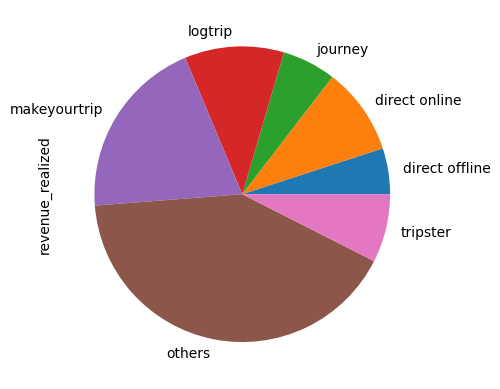

In [92]:
df_bookings_all.groupby("booking_platform")["revenue_realized"].sum().plot(kind="pie")